# Data Frame yükleme ,değerlendirme ve boş değerleri doldurma

In [32]:
import pandas as pd
import numpy as np

df = pd.read_csv("Hitters.csv")
df = df.copy()
df.head()
#veri setimizde index problemi yok 


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [33]:
df.shape


(322, 20)

In [34]:
df.isnull().sum()
# salary değişkenlerimizde boş gözlemler bulunmaktadır 
# bunları ortalama ile dolduralım 


AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [35]:
df["Salary"].fillna(df.Salary.mean() , inplace = True)
# boş maaş değerlerini ortalama ile doldurduk aslında bunları ilerde tahmin ile dolduracağız

In [36]:
df.isnull().sum().any()
# datamızda boş değer var mı ? 


False

In [37]:
df.info()
# veri setimizdeki kategorik değişkenleri düzenliyelim 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
AtBat        322 non-null int64
Hits         322 non-null int64
HmRun        322 non-null int64
Runs         322 non-null int64
RBI          322 non-null int64
Walks        322 non-null int64
Years        322 non-null int64
CAtBat       322 non-null int64
CHits        322 non-null int64
CHmRun       322 non-null int64
CRuns        322 non-null int64
CRBI         322 non-null int64
CWalks       322 non-null int64
League       322 non-null object
Division     322 non-null object
PutOuts      322 non-null int64
Assists      322 non-null int64
Errors       322 non-null int64
Salary       322 non-null float64
NewLeague    322 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 50.4+ KB


# Kategorik değişkenleri modellemeye hazır hale getirme 

In [38]:
from sklearn.preprocessing import LabelEncoder 
cat_list = ["NewLeague" , "Division" , "League"] 

lbe = LabelEncoder()
for i in cat_list:
    df[i] = lbe.fit_transform(df[i])

In [39]:
df.head(3)
# tip dönüşümlerini başarılı bir şekilde uyguladık 

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,0,0,446,33,20,535.925882,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,475.000000,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,480.000000,0


# Bagimli ve bağımsız değişken ayrışımı 

In [40]:
X = df.drop("Salary"  , axis = 1) # bagımsız degisken 

In [41]:
y = df["Salary"] #bagimli değisken 

# Veri setini Train_Test olarak ayırma

In [42]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20)

In [46]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# doğru parcalamışız

(257, 19)
(257,)
(65, 19)
(65,)


# Veri Modelleme 

In [54]:
from sklearn.cross_decomposition import PLSRegression , PLSSVD

In [55]:
pls = PLSRegression()

In [56]:
pls_model = pls.fit(X_train , y_train)

In [58]:
pls_model 
# n_components = indirgenecek değişken sayısı , ön tanımlı değeri iki


PLSRegression(copy=True, max_iter=500, n_components=2, scale=True, tol=1e-06)

In [61]:
pls_model.coef_ 
# bagımsız değişken katsayıları 


array([[ 21.52942878],
       [ 41.04976747],
       [  8.54671668],
       [ 34.75026331],
       [ 23.59833727],
       [ 29.50236051],
       [  3.75682096],
       [ 20.82363977],
       [ 28.59664972],
       [ 13.16257269],
       [ 28.74853616],
       [ 24.19003046],
       [ 11.27019633],
       [ 17.0954938 ],
       [-56.42612834],
       [ 49.26184649],
       [ 10.52655679],
       [ -6.63911224],
       [ 15.5810544 ]])

- yukarıda bizim indirgenecek değişken sayımız iki olduğu halde tüm değişkenlere ait kat sayımız var bunun sebebi pls model tahmin modelinde değerleri alıyor aralarında sınıflama yapıyor

In [64]:
pls_model.intercept_ # pls in b0 sabiti yoktur !

AttributeError: 'PLSRegression' object has no attribute 'intercept_'

- modelimiz hazır şimdi tahmin bolümüne geçelim 

# Tahmin , Hata_kareler ve r2_score 

#### Train tahmin 

In [71]:
from sklearn.metrics import mean_squared_error ,r2_score

In [74]:
y_pred = pls_model.predict(X_train)


In [79]:
np.sqrt( mean_squared_error(y_train , y_pred) )
# hata kareler ortalaması

324.34191980202536

In [80]:
r2_score(y_train , y_pred)
# acıklanabilirlik oranı 

0.35766396428292757

#### Test tahmin 

In [81]:
from sklearn.metrics import mean_squared_error , r2_score

In [82]:
y_pred = pls_model.predict(X_test)


In [84]:
np.sqrt( mean_squared_error(y_test , y_pred ) )

336.4598859305939

In [86]:
r2_score(y_test , y_pred)

0.33543176287112075

# Model Tuning , cross_val 

In [98]:
from sklearn.cross_decomposition import PLSRegression , PLSSVD
from sklearn.model_selection import cross_val_score , KFold

In [99]:
cv_10 = KFold( n_splits = 10,shuffle = True ,random_state = 1)
# evet 10 katli cross val için bu işlemi yapıyoruz 

In [100]:
X_train.shape[1]

19

In [102]:
RMSE = list()

for i in np.arange(1 , X_train.shape[1] + 1):
    pls = PLSRegression(n_components = i)
    pls_model = pls.fit(X_train , y_train)
    score = (-1 * cross_val_score( pls_model , 
                                 X_train,
                                 y_train,
                                 cv = cv_10,
                                 scoring = "neg_mean_squared_error"
                                ).mean() )
    RMSE.append(score)
RMSE

[117661.25804899416,
 115439.28815481986,
 114051.79471414883,
 113524.0521752603,
 114545.79370436782,
 114425.05301427646,
 113633.51703986782,
 111879.00192666306,
 110016.50490876737,
 109257.57732749832,
 108961.10657285829,
 108906.52393040585,
 108744.33499291023,
 109734.36685015373,
 110659.76989637905,
 109904.60822691853,
 109996.37653595912,
 109750.4202041877,
 110134.95498235108]

### Cross val sonuçlarını görselleştirme 

In [107]:
import  matplotlib.pyplot as plt 


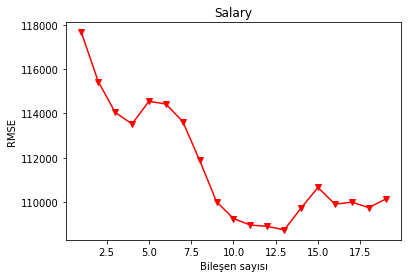

In [112]:
plt.plot(np.arange(1 , X_train.shape[1]+ 1) , np.array(RMSE) ,'-v' , c= "r")
plt.xlabel("Bileşen sayısı")
plt.ylabel("RMSE")
plt.title("Salary");

- yukarıdaki grafik incelendiğinde en optimum değişken sayısı 13 olduğu gözlemleniyor

# Final Modelini Kurma

In [116]:
from sklearn.cross_decomposition import PLSRegression 
from sklearn.metrics import mean_squared_error , r2_score


In [117]:
pls = PLSRegression(n_components = 13)
pls_model = pls.fit(X_train , y_train) 


In [118]:
pls.coef_

array([[-384.68162012],
       [ 360.07139872],
       [  44.9696313 ],
       [  13.74779371],
       [ -23.92774714],
       [  84.43433704],
       [ -61.49427137],
       [-174.28660697],
       [ 116.35814335],
       [ -12.89330491],
       [ 316.19456059],
       [ 136.64888591],
       [-172.24574428],
       [  14.18749181],
       [ -64.66608388],
       [  74.35542172],
       [  66.06098834],
       [ -31.99459868],
       [  -1.5878329 ]])

In [120]:
y_pred = pls.predict(X_test)

array([[ 420.87799255],
       [ 613.82694693],
       [ 371.83920674],
       [ 304.53574861],
       [ 414.58408217],
       [ 327.48399918],
       [ 443.00775613],
       [ 460.63088197],
       [1029.70865929],
       [ 176.08838218],
       [ 629.53620238],
       [ 632.69986319],
       [1009.06045281],
       [ 618.97612964],
       [ 502.65034555],
       [ 499.30285539],
       [1105.94967138],
       [ 371.57835277],
       [ 382.70959939],
       [ 688.23215062],
       [ 286.35392876],
       [ 416.25429971],
       [1352.09183689],
       [ 342.70904702],
       [ 271.42759448],
       [ 334.52450161],
       [ 234.75446819],
       [ 204.59834274],
       [ 577.89717175],
       [ 564.28607926],
       [ 329.21976157],
       [ 672.92496336],
       [ 305.01073383],
       [ 361.73368461],
       [ 656.92235926],
       [ 151.2280952 ],
       [ 546.46629475],
       [ 347.41649745],
       [ 350.27783811],
       [ 358.66352728],
       [ 852.95732447],
       [ 365.081

In [121]:
np.sqrt( mean_squared_error( y_test  , y_pred) )


336.4598859305939

In [122]:
r2_score(y_test , y_pred)

0.33543176287112075